### 1. En primer lugar, debemos sustentar metodológicamente:
>####    a. ¿Qué tipo de aplicación es un Análisis de sentimientos?, por favor en un párrafo de no más 6 líneas explique en qué consiste, de manera que la gerencia de analítica lo comprenda fácilmente.
>* El análisis de sentimientos utiliza algoritmos y técnicas para identificar el sentimiento (positivo, negativo o neutral) de un texto específico, siendo una poderosa aplicación de procesamiento de lenguaje natural. Tiene amplias aplicaciones en diversas industrias, como la investigación de mercados. Permite extraer opiniones de una audiencia más amplia a un costo reducido en comparación con métodos tradicionales como encuestas o entrevistas. Las organizaciones pueden recopilar datos de plataformas de redes sociales o sitios de reseñas y utilizar el análisis de sentimientos para obtener un índice general del sentimiento (aceptación o rechazo) hacia sus productos, lo que les permite tomar decisiones informadas de manera más eficiente.
>
>####    b. ¿Qué tipo de procesamiento es necesario realizar primero?, exponga en un dibujo los pasos que va a realizar sobre los comentarios con el fin de convertirlos en data estructurada.
>* Los pasos del procedimiento a realizar para convertir los comentarios a data estructurada son:
>   1. **Limpieza y normalización:** En este paso, se eliminan elementos innecesarios del texto, como caracteres especiales, enlaces o menciones. Además, se llevan las palabras expresadas de múltiples formas a una única forma base, mediante técnicas de normalización como la corrección ortográfica y la eliminación de plurales o conjugaciones verbales.
>   2. **Segmentación o tokenización:** En esta etapa, se divide el texto en unidades más pequeñas llamadas tokens o segmentos. Estos pueden ser palabras individuales o frases, dependiendo del nivel de granularidad deseado. La tokenización facilita el análisis posterior al tener una representación estructurada del texto.
>   3. **Reducción:** En este paso, se aplican técnicas de lematización y stemming. La lematización consiste en llevar las palabras a su forma base o lema, para agrupar variantes léxicas. Por ejemplo, "corriendo" y "corre" se reducirían a "correr". El stemming, por otro lado, recorta las palabras a su raíz, lo que puede generar resultados más generales. Por ejemplo, "corriendo" y "corre" se reducirían a "corr".
>   4. **Transformación a datos estructurados:** Aquí, se utiliza una representación matricial para convertir el texto en datos estructurados. Se pueden emplear técnicas como Bag-of-Words (BoW), donde cada token se convierte en una columna y se registra el recuento de apariciones en cada documento, o TF-IDF (Term Frequency-Inverse Document Frequency), que mide la importancia de un término en relación con un documento y la colección de documentos. Estas transformaciones permiten trabajar con los datos en formato numérico, facilitando su análisis y aplicando algoritmos de aprendizaje automático o minería de datos.

>![Diagrama](PNL_DIAG.jpg)

### 2. La gerencia de marketing, le ha entregado una tabla con diferentes comentarios de los clientes, la cual se llama “comentarios.csv”. Primeramente, realice una lectura de los datos, para ello use el método read_csv en vez de read_table; utilice como separador la coma (,). Indique cuántos registros tiene la tabla y cuántas columnas; visualice los 20 primeros registros.

In [1]:
import pandas as pd

# Lectura de los datos
df = pd.read_csv('comentarios.csv', sep=',')

# Cantidad registros y columnas
num_registros = df.shape[0]
num_columnas = df.shape[1]

# Mostrar los primeros 20 registros
primeros_registros = df.head(20)

print("La tabla tiene", num_registros, "registros y", num_columnas, "columnas.")
print("Los primeros 20 registros son:\n", primeros_registros)

La tabla tiene 600 registros y 3 columnas.
Los primeros 20 registros son:
     orden                                         comentario   tipo
0       1                                No les creo nada ,    malo
1       2                          Está bonita la camioneta   bueno
2       3                             Quiero más información   info
3       4            :( igual el crédito ha de ser muuuucho    malo
4       5  Quisiera, más información, pero nadie me respo...   info
5       6  cuota chica, pero digan la última cuota, de se...   malo
6       7  Yo tengo uno claro la versión anterior ,,me ha...  bueno
7       8            No lo compres, son fabricados en méxico   malo
8       9                               🥰❤❣💯, amo esta marca  bueno
9      10      más IVA? Ni que la weá la uses como camioneta   malo
10     11  Cuotas de $174.900 + pie del 49,2% (7 millones...   malo
11     12                                publicidad engañosa   malo
12     13         es mi tesoro, yo tengo 

### 3. Realice un análisis exploratorio de esta data encontrando el porcentaje de tipo de comentarios que han sido clasificados como malos, buenos o información, aplique el código Python que considere necesario y exprese el resultado en una tabla.

>#### EDA
>Se explora la data. Se realizan distintos tipos de análisis en base a la longitud del texto, frecuencia de palabras, cuantificación porcentual de tipos de comentarios y visualizaciones gráficas.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   orden       600 non-null    int64 
 1   comentario  600 non-null    object
 2   tipo        600 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.2+ KB


La data no posee datos faltantes

>#### Análisis de longitud de texto:
> Se examina la longitud de los comentarios para entender si hay algún patrón o relación entre la longitud de los comentarios y otros aspectos, como la satisfacción del cliente o la calidad del producto o servicio.

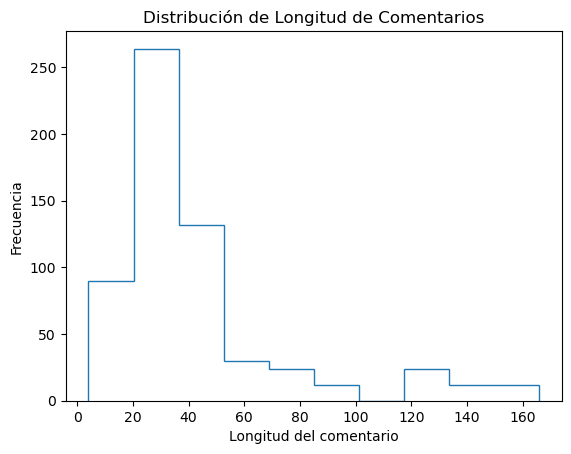

count    600.000000
mean      43.443333
std       33.884220
min        4.000000
25%       22.750000
50%       33.000000
75%       46.250000
max      166.000000
Name: longitud, dtype: float64


In [3]:
import matplotlib.pyplot as plt

# Crear copia de dataframe
comentarios_len = df

# Calcular la longitud de cada comentario
comentarios_len['longitud'] = comentarios_len['comentario'].apply(len)

# Obtener estadísticas descriptivas de la longitud de los comentarios
descripcion_longitud = comentarios_len['longitud'].describe()

# Crear un histograma de la longitud de los comentarios
plt.hist(comentarios_len['longitud'], bins=10, histtype = "step")

plt.xlabel('Longitud del comentario')
plt.ylabel('Frecuencia')
plt.title('Distribución de Longitud de Comentarios')

plt.show()
print(descripcion_longitud)

> La mayoría de los comentarios se encuentren en el rango de 20 a 40 caracteres. El comentario más largo tiene una longitud de 160 caracteres. El promedio de comentarios es de 43 caracteres, lo que sugiere una tendencia hacia comentarios de longitud moderana.

>#### Análisis de frecuencia:
> Se identifican las palabras o términos más comunes en los comentarios. Esto ayudará a comprender los temas principales, las opiniones recurrentes o las palabras clave utilizadas por los clientes.

In [4]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Unir todos los comentarios en un solo texto
comentarios = ' '.join(df['comentario'])

# Tokenizar el texto en palabras
tokens = word_tokenize(comentarios)

# Calcular la frecuencia de las palabras
freq_dist = FreqDist(tokens)

# Obtener las palabras más comunes y sus frecuencias
palabras_comunes = freq_dist.most_common(30)

# Imprimir las palabras más comunes y sus frecuencias
for word, freq in palabras_comunes:
    print(f"{word}: {freq}")

,: 246
y: 144
el: 126
la: 120
de: 120
muy: 114
es: 90
?: 84
que: 72
me: 66
lo: 66
más: 60
en: 60
los: 54
no: 54
por: 54
al: 54
con: 48
información: 42
pero: 42
.: 42
son: 36
No: 30
repuestos: 30
del: 30
respuestos: 30
!: 30
una: 30
técnico: 30
recomiendo: 30


> El análisis revela una alta frecuencia de palabras como "repuestos" y "técnico". Se realizará una visualización para una representación más clara.

>#### Visualización de palabras:
> Se utiliza una nube de palabras (word cloud) para visualizar las palabras más frecuentes en los comentarios.

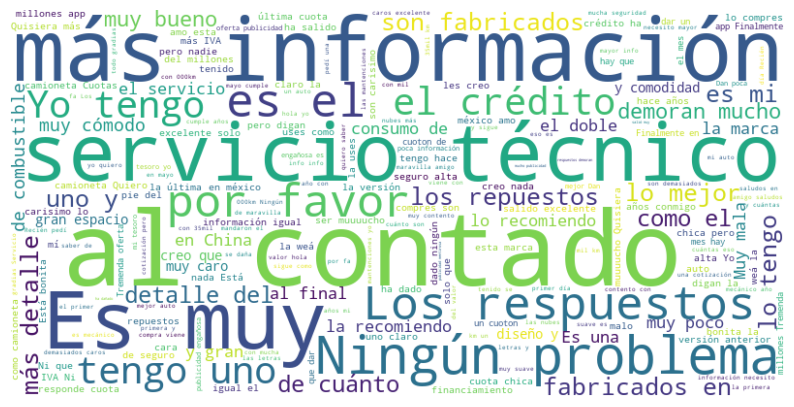

In [5]:
import wordcloud
from wordcloud import WordCloud

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comentarios)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

> El análisis revela que las frases más destacadas en los comentarios son "servicio técnico", "al contado", "más información" y "los repuestos". Estas frases proporcionan claridad sobre las raíces de los diferentes tipos de comentarios, lo cual indica las áreas específicas de interés o preocupación de los usuarios.

>#### Porcentaje de tipo de comentarios:
> Proporciona una comprensión cuantitativa de cómo se distribuyen los diferentes sentimientos en un conjunto de datos de comentarios o textos

In [6]:
# Calcular el porcentaje de cada tipo de comentario
porcentaje_comentarios = df['tipo'].value_counts(normalize=True)

# Crear una tabla con los resultados
tabla_porcentaje = pd.DataFrame({'tipo': porcentaje_comentarios.index, 'porcentaje': porcentaje_comentarios.values})

# Añadir el símbolo porcentaje a la columna 'porcentaje'
tabla_porcentaje['porcentaje'] = tabla_porcentaje['porcentaje'].apply(lambda x: '{:.1%}'.format(x))

# Ver la tabla
tabla_porcentaje

,tipo,porcentaje
0,malo,45.0%
1,bueno,37.0%
2,info,18.0%


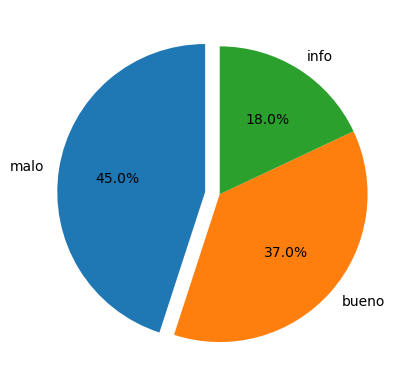

In [7]:
import matplotlib.pyplot as plt

# Para "explotar" el mayor porcentaje
explode = [0.1, 0, 0]

# Pie chart
fig, ax = plt.subplots()
ax.pie(porcentaje_comentarios.values, labels = porcentaje_comentarios.index, startangle = 90, autopct = '%1.1f%%', explode = explode)
plt.show()

>El análisis revela que el 45% de los comentarios son negativos, el 37% son positivos y el 18% solicitan más información. Estas conclusiones proporcionan información valiosa para mejorar la satisfacción del cliente y tomar decisiones estratégicas adecuadas.

### 4. Diseñe un patrón de expresión regular para utilizarlo como tokenizador más adelante; que además de las palabras en idioma español, lea los emojis como 🥰❤, también considere la expresión como “:)” como un solo token, pero que excluya la puntuación punto “.”, coma “,” y punto y coma “;”.

In [8]:
import re

# Patrón de expresión regular
patron = '\w+|:\)|[^.,;\s]'

texto = "¡Hola! Me encanta este producto 🥰❤ :) Pero, el servicio fue lento..."

# Tokenización utilizando el patrón de expresión regular
tokens = re.findall(patron, texto)

print(tokens)

['¡', 'Hola', '!', 'Me', 'encanta', 'este', 'producto', '🥰', '❤', ':)', 'Pero', 'el', 'servicio', 'fue', 'lento']


### 5. Defina el conjunto X como los comentarios del data frame, y el target y como la columna tipo.

In [9]:
# Conjunto X como los comentarios
X = df['comentario']

# Target como los tipos de comentarios
y = df['tipo']

In [10]:
X.head()

0                                  No les creo nada , 
1                            Está bonita la camioneta 
2                               Quiero más información
3              :( igual el crédito ha de ser muuuucho 
4    Quisiera, más información, pero nadie me respo...
Name: comentario, dtype: object

In [11]:
y.head()

0     malo
1    bueno
2     info
3     malo
4     info
Name: tipo, dtype: object

>Ahora X e y se pueden utilizar en tareas de análisis o modelado de datos, donde X representa los comentarios y y representa la variable objetivo o el target.